# Problema da Mochila Binária

## Exploration vs. Exploitation por Algoritmos Genéticos

![https://miro.medium.com/max/1156/1*G9WdXqxj016CaAX9zrFewQ.jpeg](https://miro.medium.com/max/1156/1*G9WdXqxj016CaAX9zrFewQ.jpeg)

In [14]:
import numpy as np
import pandas as pd
import random as rd
from random import randint
import matplotlib.pyplot as plt

In [15]:
item_number = np.arange(1,41) #items que podem ir para a mochila
weight = np.random.randint(1, 15, size=40) # pesos aleatorios
value = np.random.randint(1, 100, size=40) # valores aleatorios
knapsack_capacity = 100 # peso máximo da mochila

In [16]:
print('Possíveis itens:')
print('Item\tPeso\tValor')
for i in range(len(item_number)):
  print(f"{item_number[i]}\t{weight[i]}\t{value[i]}")

Possíveis itens:
Item	Peso	Valor
1	9	11
2	4	9
3	4	48
4	2	9
5	12	16
6	2	24
7	13	3
8	6	97
9	1	86
10	1	5
11	6	1
12	5	39
13	1	67
14	6	92
15	12	51
16	14	36
17	6	68
18	12	71
19	12	67
20	7	28
21	5	38
22	2	82
23	6	55
24	3	90
25	5	48
26	14	53
27	5	31
28	2	63
29	5	12
30	10	9
31	13	6
32	4	83
33	12	52
34	6	81
35	10	62
36	13	15
37	13	65
38	14	5
39	9	92
40	1	40


In [17]:
print('Capacidade da mochila: ', knapsack_capacity)

Capacidade da mochila:  100


## População inicial

In [18]:
solutions_per_pop = 16
pop_size = (solutions_per_pop, len(item_number))
print(f'Tamanho da população = {pop_size}')
initial_population = np.random.randint(2, size = pop_size)
initial_population = initial_population.astype(int)
num_generations = 1000
print(f'População inicial:\n {initial_population}')

Tamanho da população = (16, 40)
População inicial:
 [[0 0 0 1 0 1 0 1 1 0 0 0 1 1 1 1 1 0 1 1 1 1 1 0 0 0 1 0 1 1 0 1 1 1 1 1
  1 1 1 1]
 [0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 1 1 1 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0
  1 0 0 1]
 [0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 1 1 0 1 1
  1 1 1 1]
 [1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 0 1 1 1 0 1 0 0 0 1 1
  1 1 1 0]
 [1 1 1 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 1 1 0 1 0 0 1 1 1 0 0 1 0 1 1 0 0 1
  0 1 0 0]
 [1 1 1 1 1 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 0 0 0 0 1 0 0 0 1 0 1 0 1
  1 0 1 1]
 [1 0 0 0 1 0 1 0 1 1 1 1 0 0 1 0 0 0 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0
  0 0 1 0]
 [0 1 1 1 0 0 1 0 0 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 1 1 0 1 0
  1 1 1 0]
 [1 1 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 1 0 1 0 1 1 0 0 1 0 0 0 0 1 0
  0 1 1 0]
 [0 0 0 0 0 0 1 0 1 0 1 1 1 1 0 1 0 0 1 0 1 0 0 1 1 1 1 1 0 0 0 1 1 0 0 0
  1 0 0 1]
 [1 0 1 1 0 0 1 0 0 1 1 0 1 1 1 0 0 1 0 1 0 1 1 1 0 0 0 1 1 0 1 1 1 1 1 0
  0 0 1 0]
 [1 1 1 1 1 1

# Função de Fitness

![https://miro.medium.com/max/744/1*fenR6vIzGliZ6IfnR83stw.gif](https://miro.medium.com/max/744/1*fenR6vIzGliZ6IfnR83stw.gif)

![https://miro.medium.com/max/482/1*upStA6rK51fNybBWdifpqg.gif](https://miro.medium.com/max/482/1*upStA6rK51fNybBWdifpqg.gif)


Onde:

$n$ = tamanho de um cromossomo (solução de nosso problema)

$c_i$ = o i-ésimo gene

$v_i$ = o valor do i-ésimo gene

$W_i$ = o peso do i-ésimo gene

$kw$ = capacidade da mochila

In [19]:
def fitness(weight, value, population, capacity):
  fitness = np.empty(len(population))
  for i in range(len(fitness)):
    S1 = np.sum(population[i] * value)
    S2 = np.sum(population[i] * weight)
    if S2 <= capacity:
      fitness[i] = S1
    else:
      fitness[i] = 0
  return fitness.astype(int)

# Seleção para crossover (futura geração)

In [20]:
def selection(fitness, num_parents, population):
  fitness = list(fitness)
  parents = np.empty((num_parents, population.shape[1]))
  for i in range(num_parents):
    max_fitness_idx = np.where(fitness == np.max(fitness))
    parents[i,:] = population[max_fitness_idx[0][0], :]
    fitness[max_fitness_idx[0][0]] = -9999
  return parents

# Crossover

In [21]:
def crossover(parents, num_offsprings):
  offsprings = np.empty((num_offsprings, parents.shape[1]))
  crossover_point = int(parents.shape[1]/2)
  crossover_rate = 0.8
  # i representa o indice dos pais
  i = 0
  # cnt_offsprings = numero de filhos gerados
  cnt_offsprings = 0

  while (cnt_offsprings < num_offsprings):
    parent1_index = i%parents.shape[0] #index do genitor 1
    parent2_index = (i+1)%parents.shape[0] #indice do genitor 2
    x = rd.random()
    if x > crossover_rate:
      pass
    else:
      offsprings[cnt_offsprings,0:crossover_point] = parents[parent1_index,0:crossover_point]
      offsprings[cnt_offsprings,crossover_point:] = parents[parent2_index,crossover_point:]
      cnt_offsprings +=1
    i += 1
  return offsprings

# Mutação

In [22]:
def mutation(offsprings):
    mutants = np.empty((offsprings.shape))
    mutation_rate = 0.15
    for i in range(mutants.shape[0]):
        random_value = rd.random()
        mutants[i,:] = offsprings[i,:]
        if random_value > mutation_rate:
            continue
        int_random_value = randint(0,offsprings.shape[1]-1)
        if mutants[i,int_random_value] == 0 :
            mutants[i,int_random_value] = 1
        else :
            mutants[i,int_random_value] = 0
    return mutants

In [23]:
def optimize(weight, value, population, pop_size, num_generations, capacity):
    parameters, fitness_history = [], []
    num_parents = int(pop_size[0]/2)
    num_offsprings = pop_size[0] - num_parents
    for i in range(num_generations):
        fitness_ = fitness(weight, value, population, capacity)
        fitness_history.append(fitness_)
        parents = selection(fitness_, num_parents, population)
        offsprings = crossover(parents, num_offsprings)
        mutants = mutation(offsprings)
        population[0:parents.shape[0], :] = parents
        population[parents.shape[0]:, :] = mutants

    print('Última geraçào: \n{}\n'.format(population))
    fitness_last_gen = fitness(weight, value, population, capacity)
    print('Fitness da última geração: \n{}\n'.format(fitness_last_gen))
    max_fitness = np.where(fitness_last_gen == np.max(fitness_last_gen))
    parameters.append(population[max_fitness[0][0],:])
    return parameters, fitness_history

# Execução do Algoritmo Genético

In [24]:
parameters, fitness_history = optimize(weight, value, initial_population, pop_size, num_generations, knapsack_capacity)


Última geraçào: 
[[0 0 1 1 0 1 0 0 1 1 0 0 1 0 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0 0 0 0 1 0 0
  0 0 1 1]
 [0 0 1 1 0 1 0 0 1 1 0 0 1 0 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0 0 0 0 1 0 0
  0 0 1 1]
 [0 0 1 1 0 1 0 0 1 1 0 0 1 0 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0 0 0 0 1 0 0
  0 0 1 1]
 [0 0 1 1 0 1 0 0 1 1 0 0 1 0 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0 0 0 0 1 0 0
  0 0 1 1]
 [0 0 1 1 0 1 0 0 1 1 0 0 1 0 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0 0 0 0 1 0 0
  0 0 1 1]
 [0 0 1 1 0 1 0 0 1 1 0 0 1 0 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0 0 0 0 1 0 0
  0 0 1 1]
 [0 0 1 1 0 1 0 0 1 1 0 0 1 0 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0 0 0 0 1 0 0
  0 0 1 1]
 [0 0 1 1 0 1 0 0 1 1 0 0 1 0 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0 0 0 0 1 0 0
  0 0 1 1]
 [0 0 1 1 0 1 0 0 1 1 0 0 1 0 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0 0 0 0 1 0 0
  0 0 1 1]
 [0 0 1 1 0 1 0 0 1 1 0 0 1 0 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0 0 0 0 1 0 0
  0 0 1 1]
 [0 0 1 1 0 1 0 0 1 1 0 0 1 0 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0 0 0 0 1 0 0
  0 0 1 1]
 [0 0 0 1 0 1 0 0 1 1 0 0 1 0 0 1 1 1 1 1 1 1 0 

In [25]:
print('Indivíduo da última geração com maior fitness: \n{}'.format(parameters))

selected_items = item_number * parameters


print('\nQuais itens irão na mochila:')
peso = 0
for i in range(selected_items.shape[1]):

  if selected_items[0][i] != 0:
     print('{}'.format(selected_items[0][i]), end='\t')
     peso = peso + weight[i]


print('\nPeso total da mochila = ', peso)

Indivíduo da última geração com maior fitness: 
[array([0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1])]

Quais itens irão na mochila:
3	4	6	9	10	13	16	17	18	19	20	21	22	24	25	28	29	34	39	40	
Peso total da mochila =  100


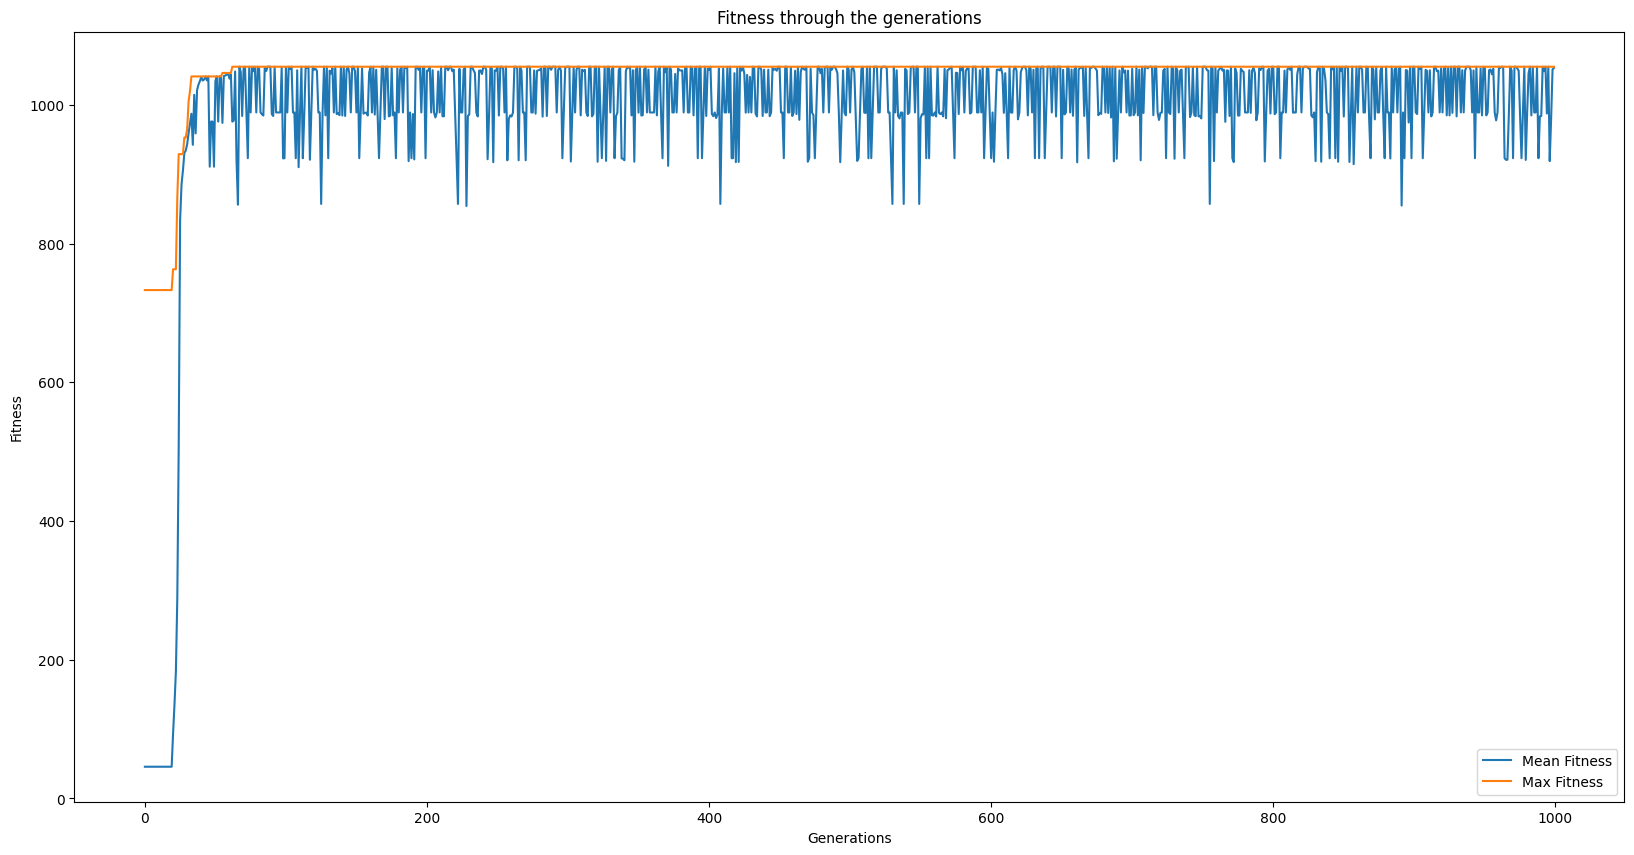

(1000, 16)


In [26]:
plt.figure(figsize=(20,10))
fitness_history_mean = [np.mean(fitness) for fitness in fitness_history]
fitness_history_max = [np.max(fitness) for fitness in fitness_history]
plt.plot(list(range(num_generations)), fitness_history_mean, label = 'Mean Fitness')
plt.plot(list(range(num_generations)), fitness_history_max, label = 'Max Fitness')
plt.legend()
plt.title('Fitness through the generations')
plt.xlabel('Generations')
plt.ylabel('Fitness')
plt.show()
print(np.asarray(fitness_history).shape)